<a href="https://colab.research.google.com/github/krishbhowmick/MadeTourEasy_DataAnalyst/blob/main/MTE_data_mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# Load the required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#import prince

In [ ]:
# Task 1 - Load a dataset and extract basic information 
df = pd.read_csv("/content/drive/My Drive/ML_Code/MTE3_Data_Mining/data.csv")
print(df.shape, "\n")
print(df.info(), "\n")
print(df.describe(), "\n")

for col in df:
  print(col + ' ' + str(df[col].nunique()))

(11914, 16) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float

In [ ]:
# Task 2 - Clean your data set
# If you are starting from this task, you can run cells from all previous tasks in 
# the kernel by going to Kernel > Restart and Run All
print(df.iloc[0,6])                #  "MANUAL"
df.iloc[0,6] = df.iloc[0,6] + ' '  #  "MANUAL "
print(df.iloc[0,6])

MANUAL
MANUAL 


In [ ]:
print(df.groupby(['Transmission Type']).size(), "\n")
df['Transmission Type'].value_counts()

Transmission Type
AUTOMATED_MANUAL     626
AUTOMATIC           8266
DIRECT_DRIVE          68
MANUAL              2934
MANUAL                 1
UNKNOWN               19
dtype: int64 



AUTOMATIC           8266
MANUAL              2934
AUTOMATED_MANUAL     626
DIRECT_DRIVE          68
UNKNOWN               19
MANUAL                 1
Name: Transmission Type, dtype: int64

In [ ]:
df = df.apply(lambda x: x.str.strip() if x.dtype=='object' else x)
df['Transmission Type'].value_counts()

AUTOMATIC           8266
MANUAL              2935
AUTOMATED_MANUAL     626
DIRECT_DRIVE          68
UNKNOWN               19
Name: Transmission Type, dtype: int64

Make                 0.000000
Model                0.000000
Year                 0.000000
Engine Fuel Type     0.000252
Engine HP            0.005792
Engine Cylinders     0.002518
Transmission Type    0.000000
Driven_Wheels        0.000000
Number of Doors      0.000504
Market Category      0.314084
Vehicle Size         0.000000
Vehicle Style        0.000000
highway MPG          0.000000
city mpg             0.000000
Popularity           0.000000
MSRP                 0.000000
dtype: float64


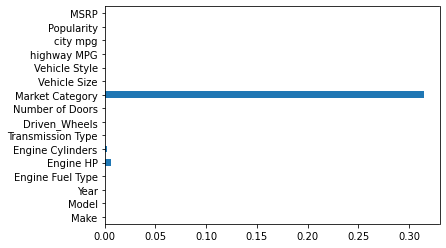

In [ ]:
print(df.isna().mean())
df.isna().mean().plot(kind='barh')
df= df.loc[:, df.isna().mean()< 0.3]

In [ ]:
# Remove Special character
df= df.replace('NA', np.nan)
df= df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11812 entries, 0 to 11913
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11812 non-null  object 
 1   Model              11812 non-null  object 
 2   Year               11812 non-null  int64  
 3   Engine Fuel Type   11812 non-null  object 
 4   Engine HP          11812 non-null  float64
 5   Engine Cylinders   11812 non-null  float64
 6   Transmission Type  11812 non-null  object 
 7   Driven_Wheels      11812 non-null  object 
 8   Number of Doors    11812 non-null  float64
 9   Vehicle Size       11812 non-null  object 
 10  Vehicle Style      11812 non-null  object 
 11  highway MPG        11812 non-null  int64  
 12  city mpg           11812 non-null  int64  
 13  Popularity         11812 non-null  int64  
 14  MSRP               11812 non-null  int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 1.4+ MB


In [ ]:
# Remove Dupliate rows
print(df.duplicated().sum())
df =df.drop_duplicates()
df.info()

720
<class 'pandas.core.frame.DataFrame'>
Int64Index: 11092 entries, 0 to 11913
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11092 non-null  object 
 1   Model              11092 non-null  object 
 2   Year               11092 non-null  int64  
 3   Engine Fuel Type   11092 non-null  object 
 4   Engine HP          11092 non-null  float64
 5   Engine Cylinders   11092 non-null  float64
 6   Transmission Type  11092 non-null  object 
 7   Driven_Wheels      11092 non-null  object 
 8   Number of Doors    11092 non-null  float64
 9   Vehicle Size       11092 non-null  object 
 10  Vehicle Style      11092 non-null  object 
 11  highway MPG        11092 non-null  int64  
 12  city mpg           11092 non-null  int64  
 13  Popularity         11092 non-null  int64  
 14  MSRP               11092 non-null  int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 1.4+ MB


(array([   0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 <a list of 7 Text major ticklabel objects>)

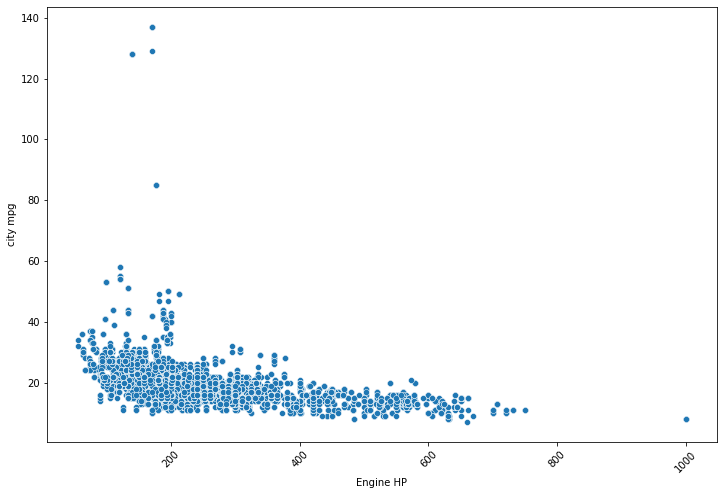

In [ ]:
# Task 3 - Visualize patterns and outliers in your data set
# If you are starting from this task, you can run cells from all previous tasks in 
# the kernel by going to Kernel > Restart and Run All

fig,ax= plt.subplots(figsize=(12,8))
#sns.scatterplot(data=df, x="Engine HP", Y="city mpg" )  # Y-capital
sns.scatterplot(data=df, x="Engine HP", y="city mpg")
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

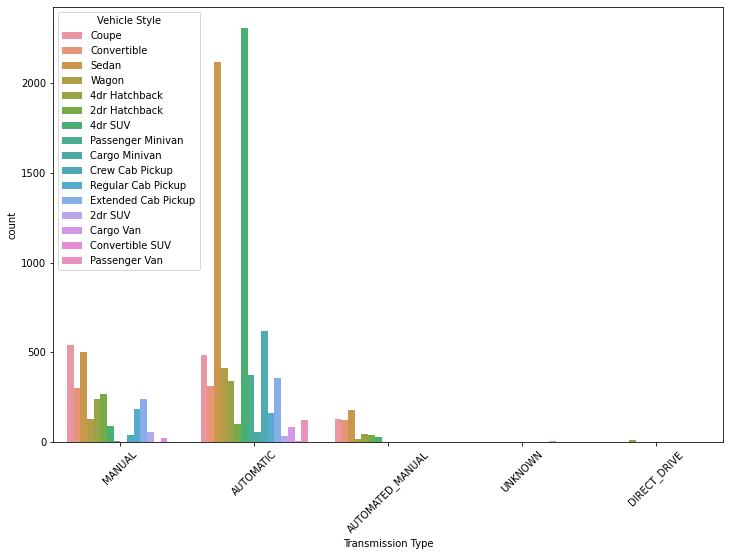

In [ ]:
fig,ax= plt.subplots(figsize=(12,8))
sns.countplot(x="Transmission Type", hue="Vehicle Style", data=df, ax=ax )
plt.xticks(rotation=45)

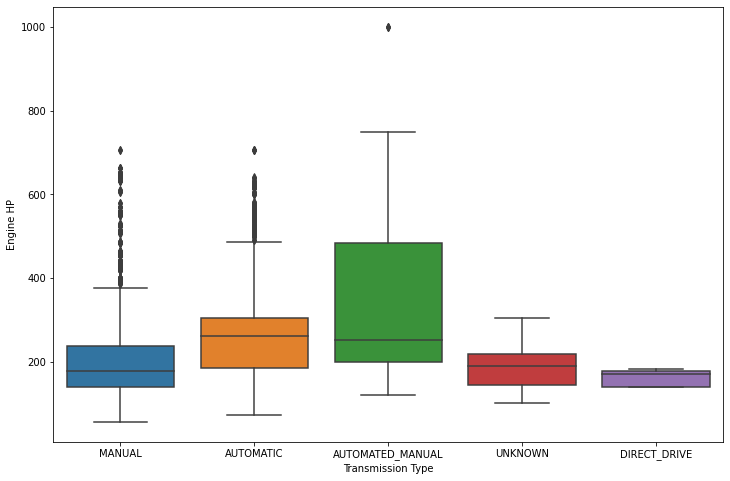

In [ ]:
fig,ax= plt.subplots(figsize=(12,8))
sns.boxplot(x="Transmission Type", y="Engine HP", data=df)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


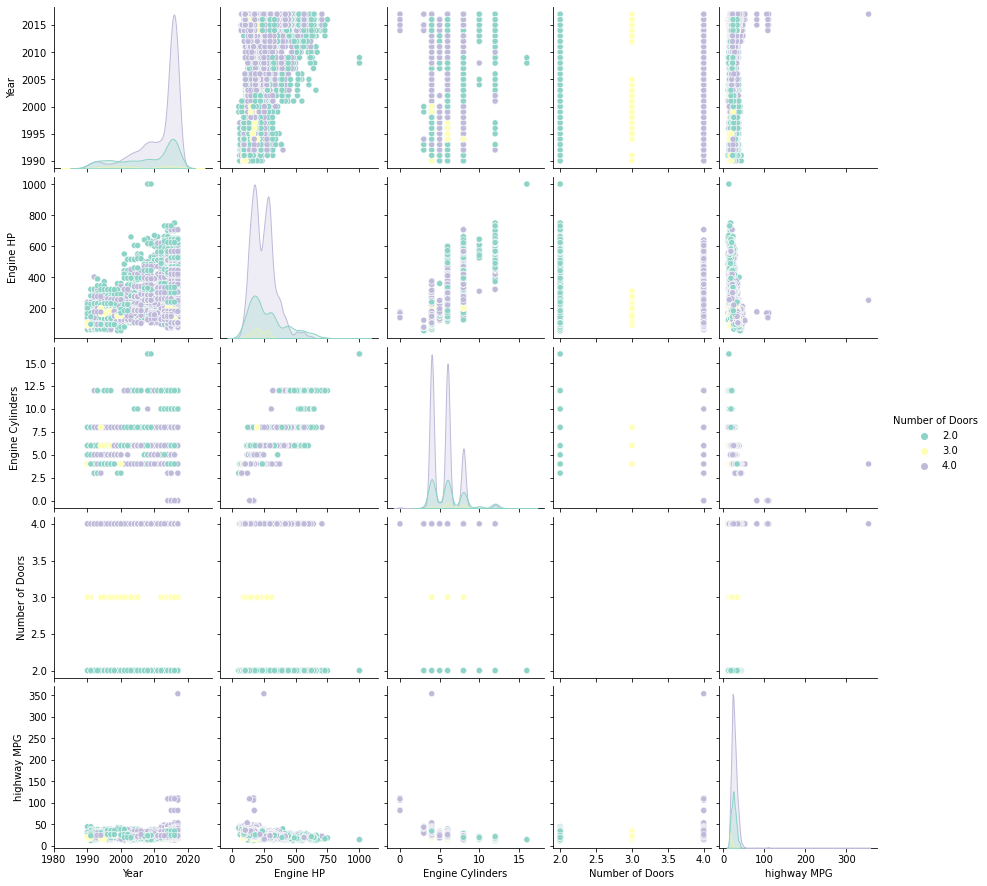

In [ ]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
sns.pairplot(df, vars=numeric_cols[:5], hue="Number of Doors", palette="Set3")

In [ ]:
# Task 4 - Find and visualize correlations in your data set
# If you are starting from this task, you can run cells from all previous tasks in 
# the kernel by going to Kernel > Restart and Run All

df_num = df[numeric_cols]
df_corr = df_num.corr()
print(df_corr, "\n")
print(df_corr.mean(), "\n")        # mean corr
print(df_corr.abs().mean(), "\n")  # absilutely corr

                      Year  Engine HP  ...  Popularity      MSRP
Year              1.000000   0.337207  ...    0.086693  0.209315
Engine HP         0.337207   1.000000  ...    0.041352  0.658987
Engine Cylinders -0.026926   0.788325  ...    0.042393  0.552042
Number of Doors   0.245804  -0.128704  ...   -0.059199 -0.145690
highway MPG       0.265521  -0.423809  ...   -0.024804 -0.207796
city mpg          0.220037  -0.474851  ...   -0.007093 -0.232722
Popularity        0.086693   0.041352  ...    1.000000 -0.048438
MSRP              0.209315   0.658987  ...   -0.048438  1.000000

[8 rows x 8 columns] 

Year                0.292206
Engine HP           0.224813
Engine Cylinders    0.119831
Number of Doors     0.127319
highway MPG         0.119250
city mpg            0.106385
Popularity          0.128863
MSRP                0.223212
dtype: float64 

Year                0.298938
Engine HP           0.481654
Engine Cylinders    0.475859
Number of Doors     0.247688
highway MPG         0.4370

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 <a list of 8 Text major ticklabel objects>)

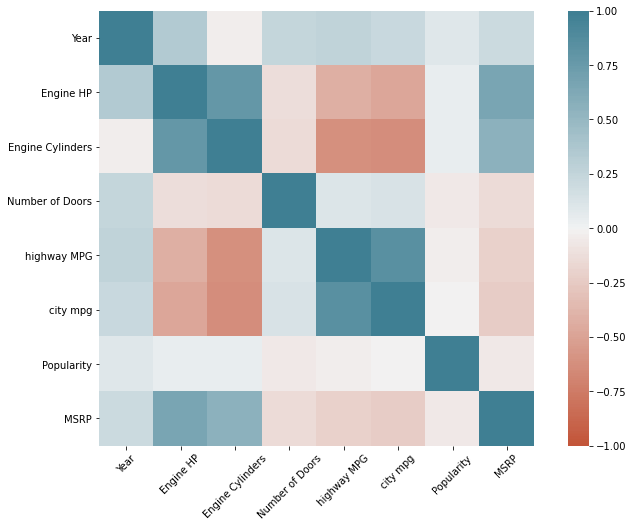

In [ ]:
fig,ax= plt.subplots(figsize=(12,8))
sns.heatmap(df_corr, square=True, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20,220, n=200))
plt.xticks(rotation=45)

In [ ]:
# Task 5 - Cluster your data set to identify similar groups
# If you are starting from this task, you can run cells from all previous tasks in 
# the kernel by going to Kernel > Restart and Run All

print(df_num.columns.tolist())
x= StandardScaler().fit_transform(df_num)
kmeans= KMeans(n_clusters=5, init='random')
kmeans.fit(x)
pred= kmeans.predict(x)
np.unique(pred)

['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors', 'highway MPG', 'city mpg', 'Popularity', 'MSRP']


array([0, 1, 2, 3, 4], dtype=int32)

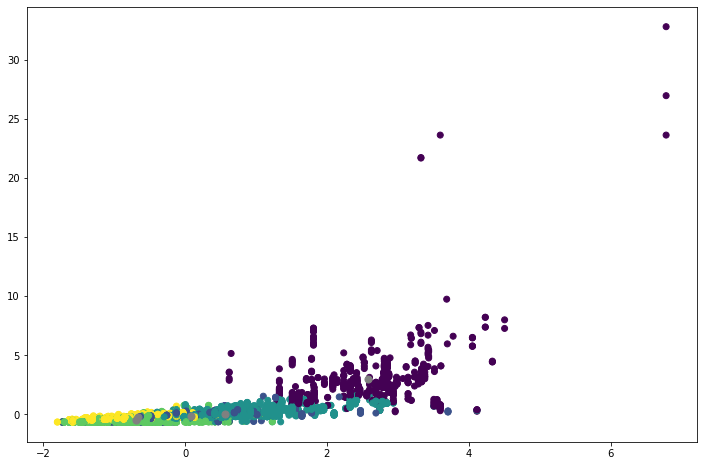

In [ ]:
fig,ax= plt.subplots(figsize=(12,8))
plt.scatter(x[:,1], x[:,7], c=pred, cmap='viridis')
centers= kmeans.cluster_centers_
plt.scatter(centers[:,1], centers[:,7], c='grey', s=50)

In [ ]:
# Task 6 - Visualize your data set with principal component analysis (PCA)
# If you are starting from this task, you can run cells from all previous tasks in 
# the kernel by going to Kernel > Restart and Run All

pca= PCA(n_components=0.95)
pca.fit(x)
pcad= pca.transform(x)
print(pca.explained_variance_ratio_)

[0.40608101 0.20002321 0.12974022 0.12532734 0.06433734 0.0398485 ]


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


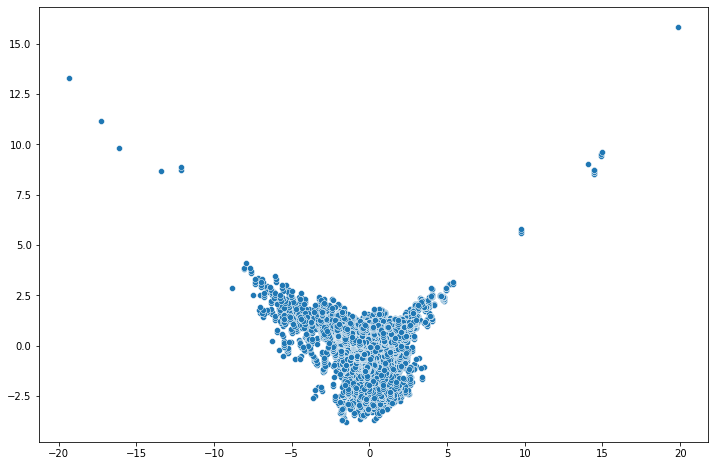

In [ ]:
fig,ax=plt.subplots(figsize=(12,8))
sns.scatterplot(pcad[:,0], pcad[:,1])

In [ ]:
pca2= prince.PCA(n_components=6, n_iter=3, rescale_with_mean=True, rescale_with_std=True, copy=True, engine='auto')
pca2=pca2.fit(df_num)
pca2.explained_inertia_


NameError: ignored

In [ ]:
ax= pca2.plot_row_coordinates(df_num, ax=None, figsize=(12,8), x_component=0, y_component=1, 
                              labels=None, color_labels=df['Transmission Type'], ellipse_outline=False, ellipse_fill=True, 
                              show_points=True )